<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw5_mc_02_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment Outline
- Desgin a python function pi_mc(N, m) with
  - Input: Two integer numbers $N$ and $m$
  - Output: An array of length $m$, where all componets are independent, and computed from ordinary monte carlo method for $\pi$ with $N$ simulations (random shots).
- For $N \in \{2^n: n = 5, \ldots, 10\}$: Run pi_mc(N, 100) and find its variance
- Plot log-log chart for $N \to RMSE(N)$ using the array above and find convergence rate
- Can you propose a deterministic approximation to $\pi$?

Given that we are not supplied with any restrictions on how to make the Monte Carlo method, I shall opt to use something similar to what was demonstrated in lecture. I shall have each simulation be a mapping of dots to the unit grid, and shall use the proportion of those which are present inside the unit circle to be my measure of pi. As usual, start by importing modules.

In [0]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

In [0]:
def pi_mc(N,m):
  # Bounding box area
  box_area = 4.0
  
  # Number of samples
  N_total = N
  
  # Create vector to store outputs
  output_array = []
  
  # Iterate the sequence m times.
  for i in range(m):
    # Draw random points uniformly between -1 and 1
    X = np.random.uniform(low=-1, high=1, size=N_total)  
    Y = np.random.uniform(low=-1, high=1, size=N_total)
    
    # Calculate distance from point to center to determine if point is inside the circle
    distance = np.sqrt(X**2 + Y**2)
    
    # Check for whether the point is inside the circle
    is_point_inside = distance<1.0
    
    # Count number of hits
    N_inside = np.sum(is_point_inside)
    
    # Estimate of circle's area and append to output list
    circle_area = box_area * N_inside/N_total
    output_array.append(circle_area)
  return output_array


Now, let us test this with the first value in the set we wanted to consider, $2^{5}$.

In [0]:
test_array_1 = np.asarray(pi_mc(2**5,100));
test_array_1.mean()

3.14125

To ensure that we're getting numbers that seem valid (as these are rather static but we are only using 32 simulations per output), check the high end value of $2^{10}=1,024$.

In [0]:
test_array_2 = np.asarray(pi_mc(2**10,100));
test_array_2.mean()

3.1473046875

These seem to be operating relatively accurately. Thus, we will opt to find the variances now for $2^{n}, n \in (5, \cdots,10)$.

In [0]:
pi_array_2_to_5 = np.asarray(pi_mc(2**5,100));
pi_array_2_to_6 = np.asarray(pi_mc(2**6,100));
pi_array_2_to_7 = np.asarray(pi_mc(2**7,100));
pi_array_2_to_8 = np.asarray(pi_mc(2**8,100));
pi_array_2_to_9 = np.asarray(pi_mc(2**9,100));
pi_array_2_to_10 = np.asarray(pi_mc(2**10,100));

var_2_to_5 = np.var(pi_array_2_to_5);
var_2_to_6 = np.var(pi_array_2_to_6);
var_2_to_7 = np.var(pi_array_2_to_7);
var_2_to_8 = np.var(pi_array_2_to_8);
var_2_to_9 = np.var(pi_array_2_to_9);
var_2_to_10 = np.var(pi_array_2_to_10);

print("Variance for N = 2^5 is "+str(var_2_to_5))
print("Variance for N = 2^6 is "+str(var_2_to_6))
print("Variance for N = 2^7 is "+str(var_2_to_7))
print("Variance for N = 2^8 is "+str(var_2_to_8))
print("Variance for N = 2^9 is "+str(var_2_to_9))
print("Variance for N = 2^10 is "+str(var_2_to_10))

Variance for N = 2^5 is 0.09030625000000002
Variance for N = 2^6 is 0.03816250000000001
Variance for N = 2^7 is 0.01904296875
Variance for N = 2^8 is 0.0105041748046875
Variance for N = 2^9 is 0.0057884765625000004
Variance for N = 2^10 is 0.0033736328124999992


We can see that as N increases, the variance gets smaller and smaller. Now, need to compute the values of $RMSE(N)$ in order to create the log-log chart. First, we define an RMSE function.

In [0]:
def rmse_of_vector(predictions, act_vals):
  # Default check: make sure both vectors are same length.
  if len(predictions) == len(act_vals):
    pass
  else:
    return("Inputs are not the same length.")
  # Produce difference between estimates and target values (actual value)
  diff_vector = [predictions[i]-act_vals[i] for i in range(len(predictions))]
  
  # Take square of above values
  diff_square = [diff_vector[i]**2 for i in range(len(diff_vector))]
  
  # Convert to array, find mean.
  diff_array = np.asarray(diff_square)
  diff_mean = diff_array.mean()
  
  # RMSE is square root of above mean value.
  rmse = np.sqrt(diff_mean)
  return rmse

Now, compute and graph RMSE for each N.

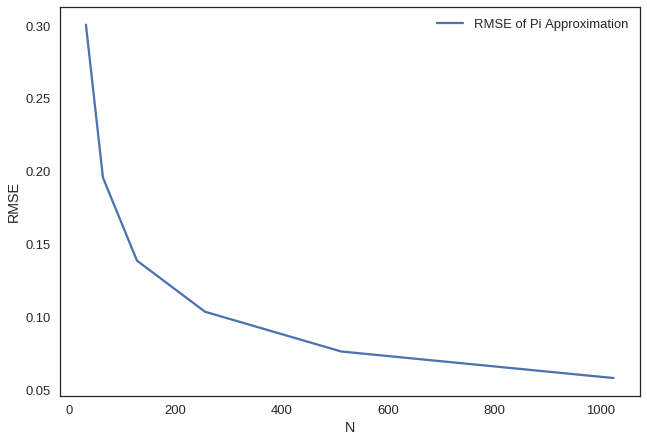

In [0]:
target_vector = []
for i in range(100):
  target_vector.append(np.pi)

N_vector = [2**5, 2**6, 2**7, 2**8, 2**9, 2**10]
RMSE_vector = [rmse_of_vector(pi_array_2_to_5,target_vector),
              rmse_of_vector(pi_array_2_to_6,target_vector),
              rmse_of_vector(pi_array_2_to_7,target_vector),
              rmse_of_vector(pi_array_2_to_8,target_vector),
              rmse_of_vector(pi_array_2_to_9,target_vector),
              rmse_of_vector(pi_array_2_to_10,target_vector)]

plt.plot(N_vector,RMSE_vector,label="RMSE of Pi Approximation")
plt.xlabel("N")
plt.ylabel("RMSE")
plt.legend()

Now, we compute log-log values. Take the log of both the X and Y inputs into the above plt.plot() function.

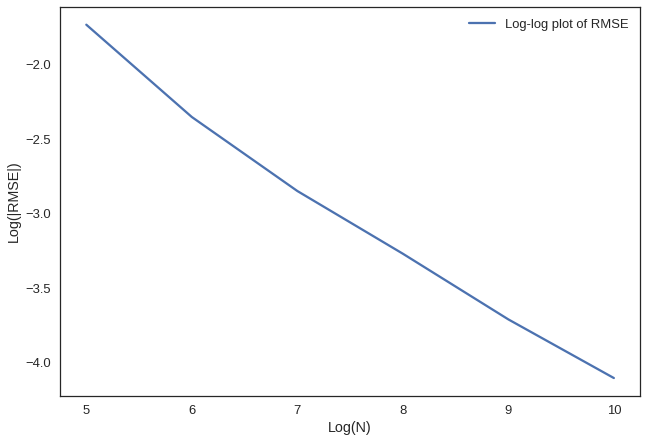

In [0]:
nn = np.log2(N_vector)
yy = np.log2(np.abs(RMSE_vector))

plt.plot(nn,yy,label="Log-log plot of RMSE")
plt.xlabel("Log(N)")
plt.ylabel("Log(|RMSE|)")
plt.legend()

It's not a perfect line, but it's close. The non-linear aspect is likely due to randomness. Regress and identify convergence rate.

In [0]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('----->>>the convergence order is ' + str(-out[0]))

----->>>the convergence order is 0.46728250307188623


Now, propose a deterministic approximation to $\pi$. I will suggest the approximation outlined in class:

Given a value N, inscribe an N-sided polygon into the unit circle. The area of this polygon can be calculated easily, as it will be composed of $N$ triangles whose areas are each $\frac{1}{2}a*b*sin(\theta)$, where $a=b=1$ are the sides of the triangle representing line segments from the center of the circle to the edge where a vertex of the polygon is transcribed, and $\theta$ represents the angle formed by $a$ and $b$, which is equal to $\frac{2\pi}{N}$ radians (or $\frac{360}{N} in degrees). Produce this code.

In [0]:
def pi_det(N):
  # Compute theta for above equation.
  theta = (2*np.pi)/N
  
  # Compute area of a single triangle.
  triangle_area = 0.5 * np.sin(theta)
  
  # Compute area of full polygon, i.e. sum of N copies of the above triangle.
  pi_est = triangle_area * N
  return pi_est

Now, repeat above process. Use $2^{N}, N\in (5, \cdots, 10)$.

Pi_det(2**10) returns 3.1415729403670913
>>>>>>>>>>>>>>>>Pi is 3.141592653589793


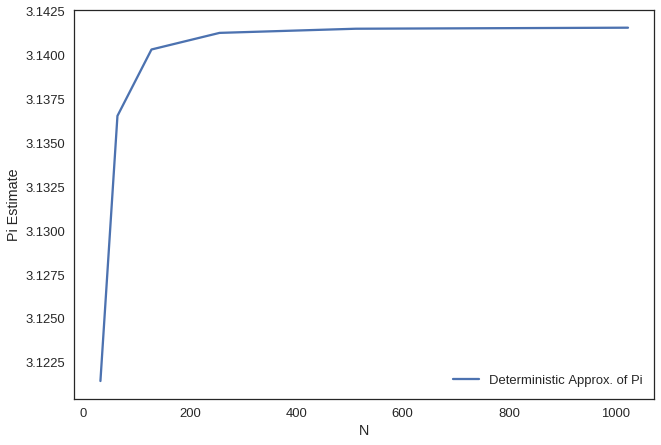

In [17]:
pi_est_2_to_5 = pi_det(2**5);
pi_est_2_to_6 = pi_det(2**6);
pi_est_2_to_7 = pi_det(2**7);
pi_est_2_to_8 = pi_det(2**8);
pi_est_2_to_9 = pi_det(2**9);
pi_est_2_to_10 = pi_det(2**10);

Pi_est_vector = [pi_est_2_to_5,
                pi_est_2_to_6,
                pi_est_2_to_7,
                pi_est_2_to_8,
                pi_est_2_to_9,
                pi_est_2_to_10]

plt.plot(N_vector,Pi_est_vector,label="Deterministic Approx. of Pi")
plt.xlabel("N")
plt.ylabel("Pi Estimate")
plt.legend()
print("Pi_det(2**10) returns "+str(pi_est_2_to_10))
print(">>>>>>>>>>>>>>>>Pi is "+str(np.pi))

As we can see, the approximation with a polygon with $2^{10}$ sides is very close to $\pi$, within 0.00002. Now compute log-log chart to identify convergence rate. First, create a secondary version of the RMSE code that deals with single values.

In [0]:
def rmse_of_value(prediction, act_val):
  # Produce difference between estimates and target values (actual value)
  diff = prediction - act_val
  
  # Take square of above values
  diff_square = diff **2
  
  # RMSE is square root of above value.
  rmse = np.sqrt(diff_square)
  return rmse

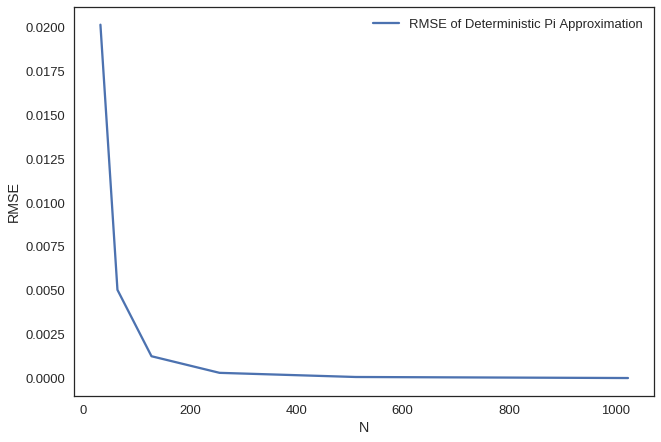

In [21]:
det_RMSE_vector = [rmse_of_value(pi_est_2_to_5,np.pi),
              rmse_of_value(pi_est_2_to_6,np.pi),
              rmse_of_value(pi_est_2_to_7,np.pi),
              rmse_of_value(pi_est_2_to_8,np.pi),
              rmse_of_value(pi_est_2_to_9,np.pi),
              rmse_of_value(pi_est_2_to_10,np.pi)]

plt.plot(N_vector,det_RMSE_vector,label="RMSE of Deterministic Pi Approximation")
plt.xlabel("N")
plt.ylabel("RMSE")
plt.legend()

Now, compute log-log values again.

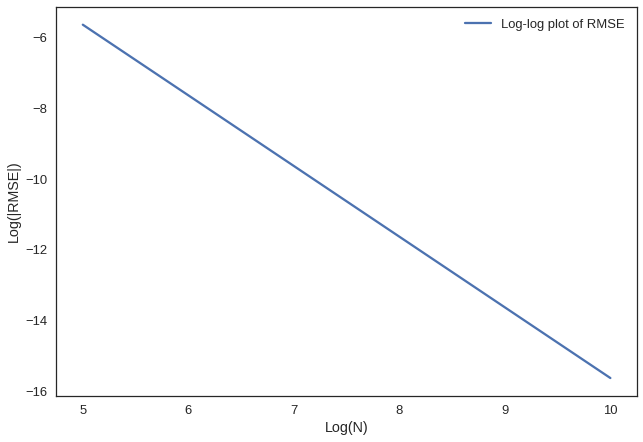

In [22]:
yy_2 = np.log2(np.abs(det_RMSE_vector))

plt.plot(nn,yy_2,label="Log-log plot of RMSE")
plt.xlabel("Log(N)")
plt.ylabel("Log(|RMSE|)")
plt.legend()

This line is perfectly linear which makes sense; we are now considering a fully deterministic approach. Identify convergence rate.

In [23]:
out_2 = ss.linregress(nn,yy_2)
print('----->>>the convergence order is ' + str(-out_2[0]))

----->>>the convergence order is 1.9995406935466833


Thus, this deterministic approach has a convergence rate of about 2.